**B)	Apply clustering algorithms**

In [11]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN;
from sklearn.metrics import silhouette_score, davies_bouldin_score

1.  Download and Load the dataset

In [12]:
df = pd.read_csv("./penguins.csv")
print(df.head())
print("\nSize of Dataset:")
df.shape

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Size of Dataset:


(344, 7)

2.  Perform necessary visualizations and pre-processing steps. Drop the target column ‘Species’.

In [13]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [14]:
# Iterate through each column in the dataframe
for column in df.columns:
    # Get unique values for the current column
    unique_values = df[column].unique()

    # Print the column name and its unique values
    print(f"Unique values in column '{column}':")
    print(unique_values)


Unique values in column 'species':
['Adelie' 'Chinstrap' 'Gentoo']
Unique values in column 'island':
['Torgersen' 'Biscoe' 'Dream']
Unique values in column 'bill_length_mm':
[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1
 35.  34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7
 45.2 46.1 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5
 50.6 46.7 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9
 45.5 50.8 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8
 55.8 43.5 49.6 48.7 43.3 48.4 45.1 46.3 44.5 47.8 48.2 47.3 59.6 49.1
 42.6 44.4 44.  45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5
 47.4 43.4 52.1 49.4 55.9 47.2 41.7 53.4 55.1

In [15]:
# performing categorical column identification
cols = df.select_dtypes(include=['object'])
for col in cols:
  print(col)
  print(df[col].unique())


species
['Adelie' 'Chinstrap' 'Gentoo']
island
['Torgersen' 'Biscoe' 'Dream']
sex
['MALE' 'FEMALE' nan]


In [16]:
from sklearn.preprocessing import LabelEncoder

# performing categorical column identification
cols = df.select_dtypes(include=['object'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column and apply label encoding
for col in cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the dataframe after label encoding
print(df.head())


   species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       2            39.1           18.7              181.0   
1        0       2            39.5           17.4              186.0   
2        0       2            40.3           18.0              195.0   
3        0       2             NaN            NaN                NaN   
4        0       2            36.7           19.3              193.0   

   body_mass_g  sex  
0       3750.0    1  
1       3800.0    0  
2       3250.0    0  
3          NaN    2  
4       3450.0    0  


In [17]:
df.shape

(344, 7)

In [18]:
t = df["species"]

# isolating the species column
X = df.drop(columns={"species"})

t.unique()

array([0, 1, 2])

3. Apply kMeans, AgglomerativeClustering and DBSCAN.

1)k-means

In [19]:
# k-means is sensitive to the scale of the features, so scaling the data before clustering.

minmax = MinMaxScaler()
scaled_df = minmax.fit_transform(df)

df = pd.DataFrame(scaled_df)

# some column contains null values need to replace
for col in df.columns:
  if(df[col].isnull().sum() > 0):
    df[col] = df[col].fillna(df[col].median())


In [20]:
from sklearn.manifold import TSNE

# Assuming df contains your preprocessed data
# reduce the dimesion to 2 so as to be able to visualize it

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
df = tsne.fit_transform(df)

# Now df contains data with reduced dimensions

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


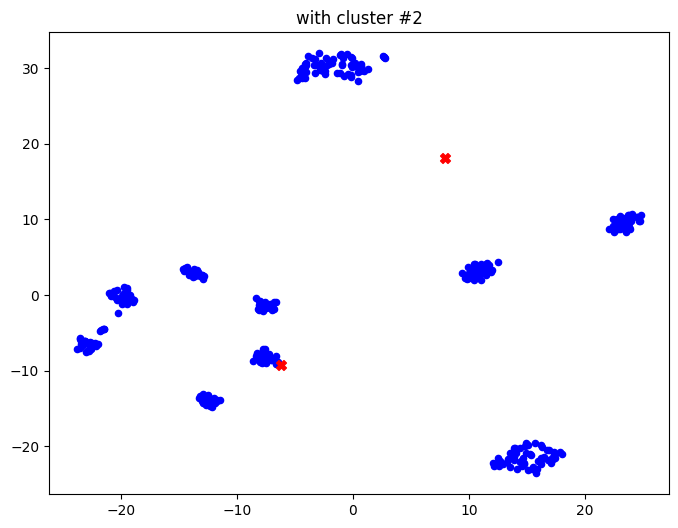

Silhouette Score for 2 clusters: 0.48
Davies-Bouldin Index for 2 clusters: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


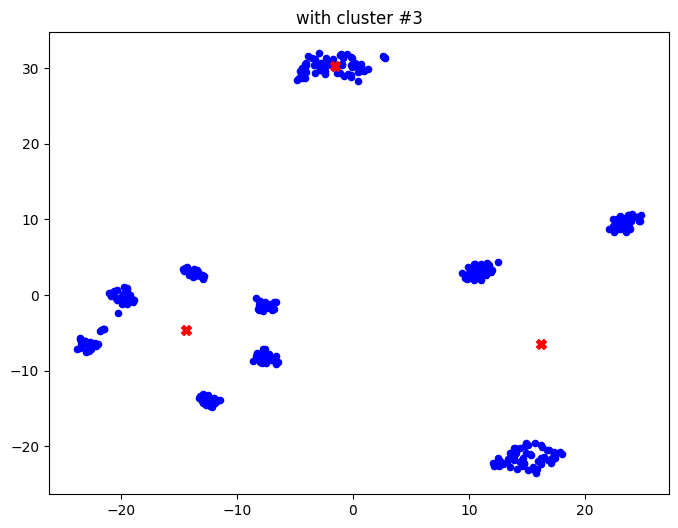

Silhouette Score for 3 clusters: 0.65
Davies-Bouldin Index for 3 clusters: 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


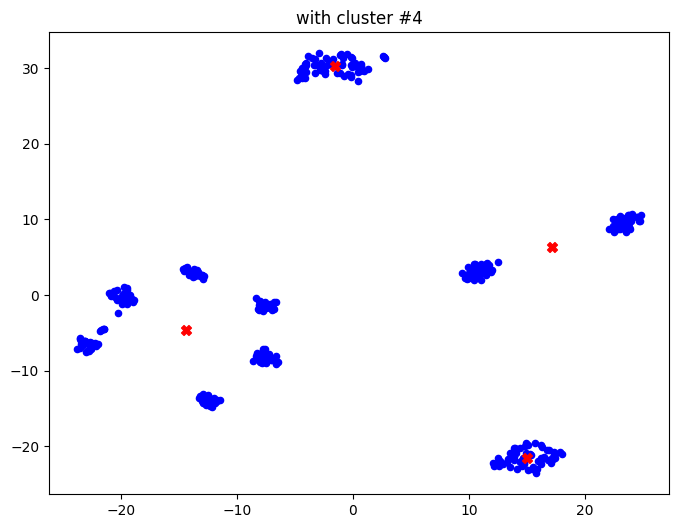

Silhouette Score for 4 clusters: 0.77
Davies-Bouldin Index for 4 clusters: 0.38


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


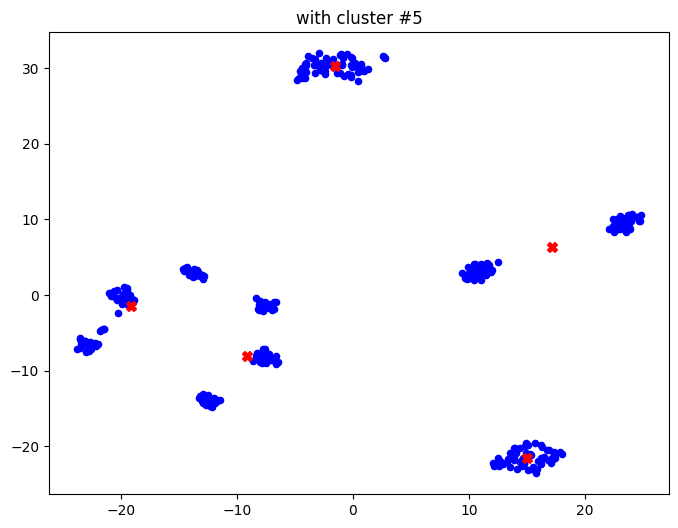

Silhouette Score for 5 clusters: 0.71
Davies-Bouldin Index for 5 clusters: 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


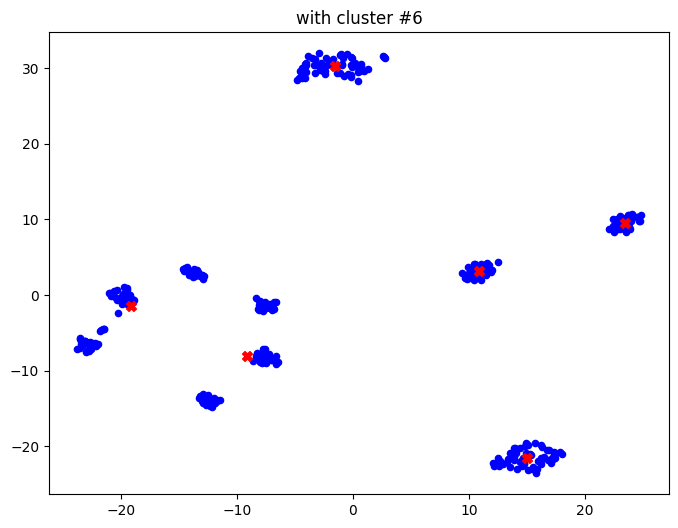

Silhouette Score for 6 clusters: 0.75
Davies-Bouldin Index for 6 clusters: 0.41


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


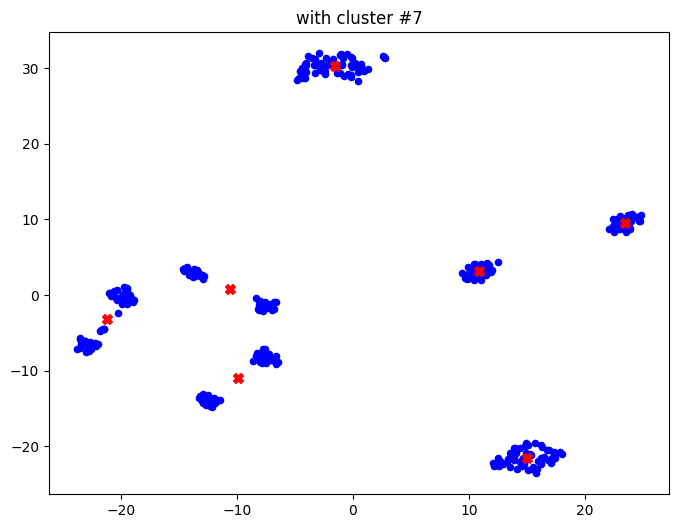

Silhouette Score for 7 clusters: 0.78
Davies-Bouldin Index for 7 clusters: 0.38


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


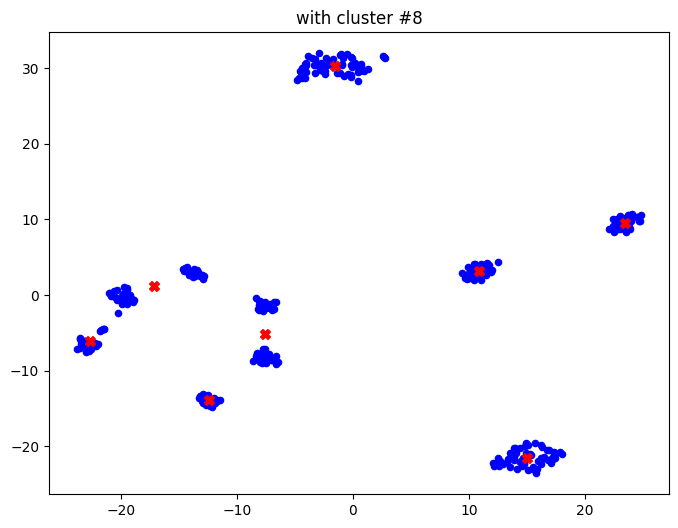

Silhouette Score for 8 clusters: 0.79
Davies-Bouldin Index for 8 clusters: 0.35


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


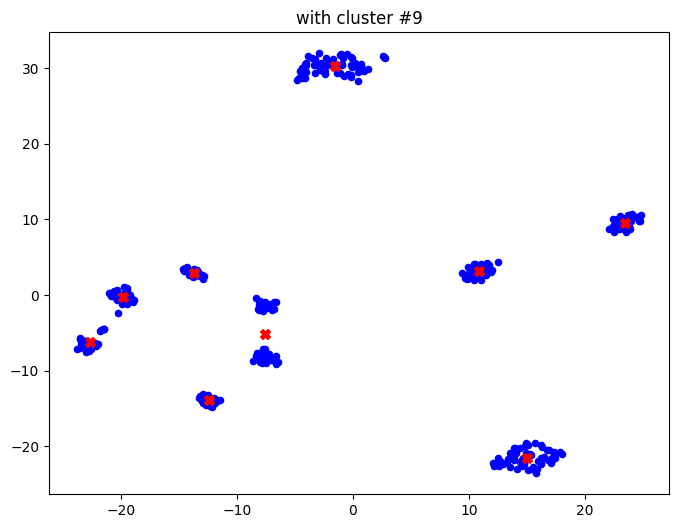

Silhouette Score for 9 clusters: 0.82
Davies-Bouldin Index for 9 clusters: 0.28


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Loop through different numbers of clusters
for i in range(2, 10):
    # Initialize KMeans with i clusters
    kmeans = KMeans(n_clusters=i)

    # Fit KMeans to the data
    kmeans.fit(df)

    # Get cluster labels
    labels = kmeans.labels_

    # Visualize clusters in a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[:, 0], df[:, 1], marker='o', color='blue', s=20)  # Plot data points
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=50)  # Plot cluster centers
    plt.title("with cluster #" + str(i))
    plt.show()

    # Calculate evaluation metrics
    silhouette = silhouette_score(df, labels)  # Calculate silhouette score
    davies_bouldin = davies_bouldin_score(df, labels)  # Calculate Davies-Bouldin index

    # Print evaluation metrics
    print("Silhouette Score for", i, "clusters:", round(silhouette, 2))
    print("Davies-Bouldin Index for", i, "clusters:", round(davies_bouldin, 2))


2)Agglomerative Clustering

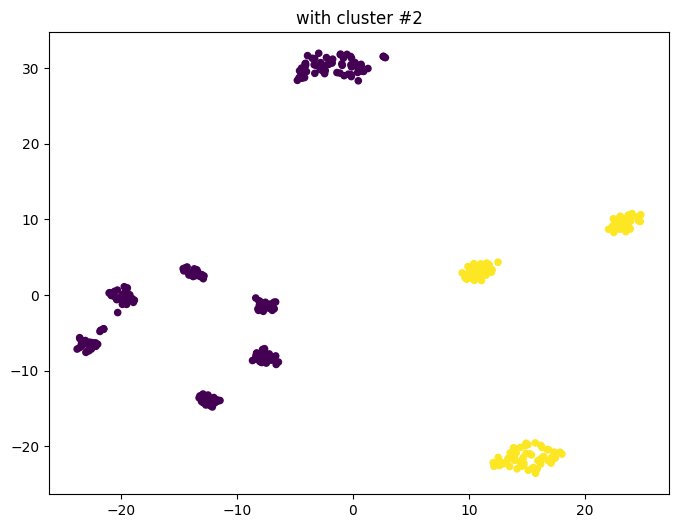

Silhouette Score for 2 clusters: 0.45
Davies-Bouldin Index for 2 clusters: 1.07


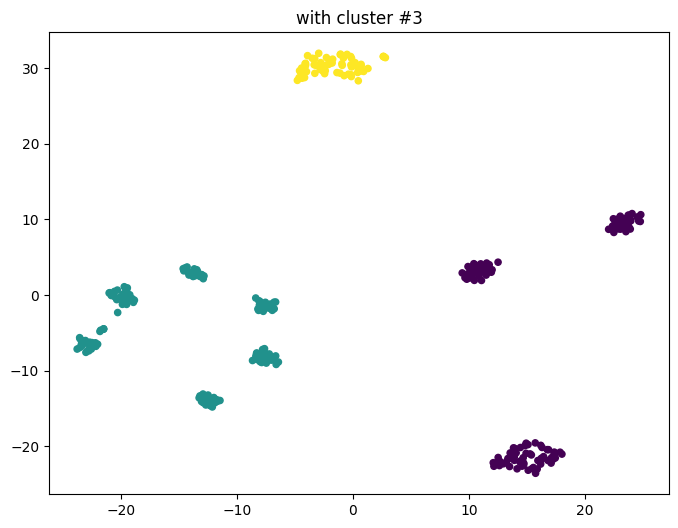

Silhouette Score for 3 clusters: 0.65
Davies-Bouldin Index for 3 clusters: 0.63


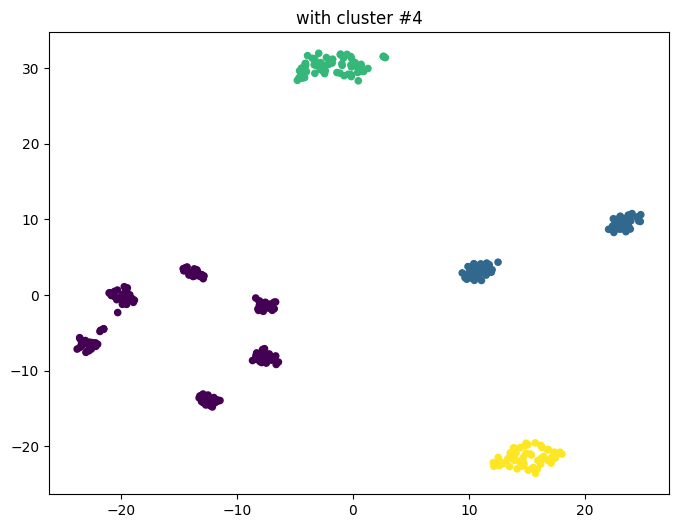

Silhouette Score for 4 clusters: 0.77
Davies-Bouldin Index for 4 clusters: 0.38


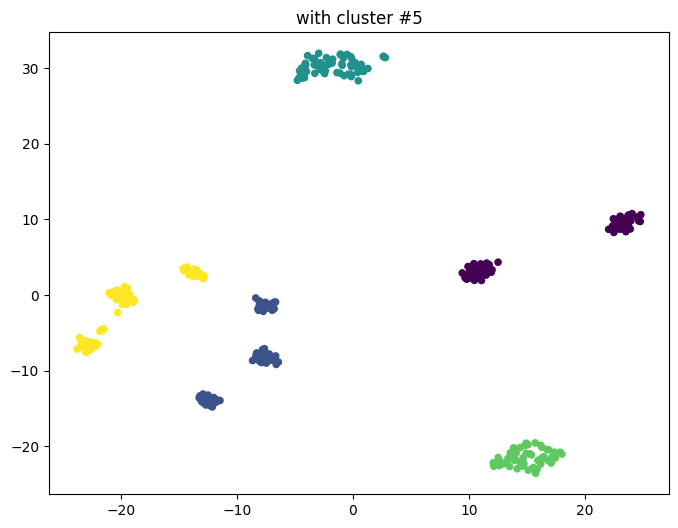

Silhouette Score for 5 clusters: 0.71
Davies-Bouldin Index for 5 clusters: 0.52


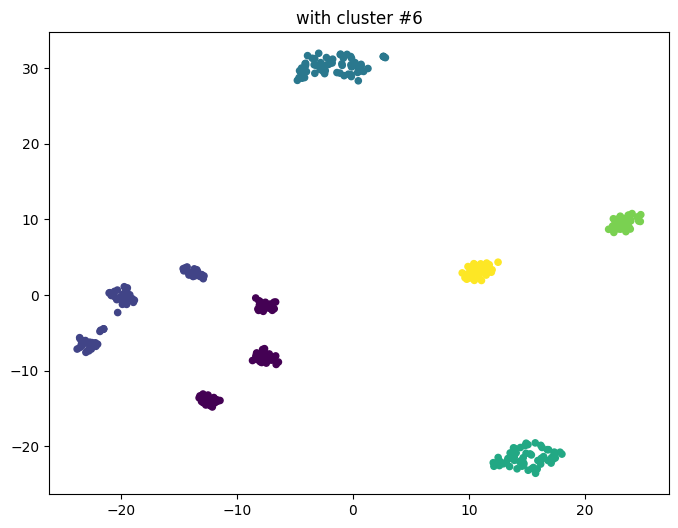

Silhouette Score for 6 clusters: 0.75
Davies-Bouldin Index for 6 clusters: 0.41


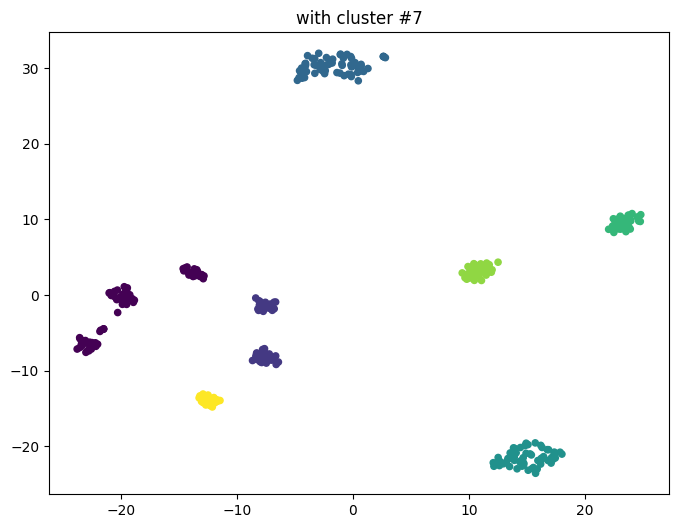

Silhouette Score for 7 clusters: 0.76
Davies-Bouldin Index for 7 clusters: 0.35


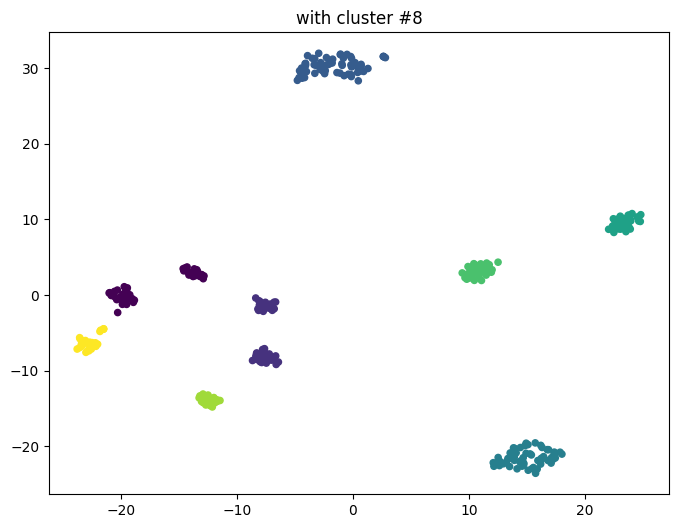

Silhouette Score for 8 clusters: 0.79
Davies-Bouldin Index for 8 clusters: 0.35


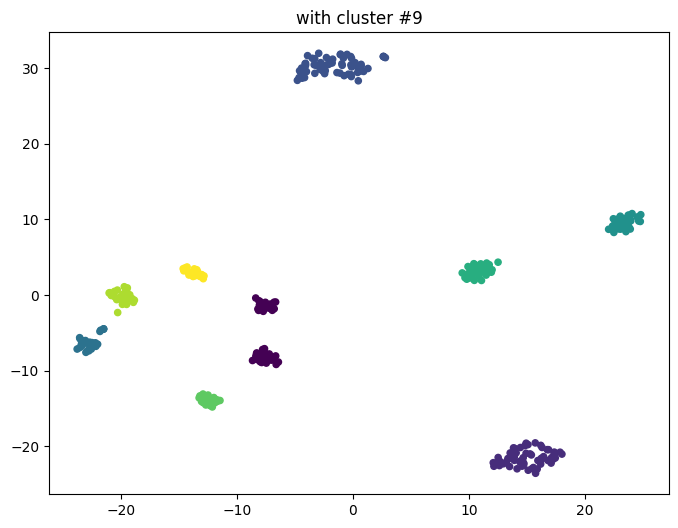

Silhouette Score for 9 clusters: 0.82
Davies-Bouldin Index for 9 clusters: 0.28


In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Loop through different numbers of clusters
for i in range(2, 10):
    # Initialize AgglomerativeClustering with i clusters
    aglo = AgglomerativeClustering(n_clusters=i)

    # Fit and predict clusters
    labels = aglo.fit_predict(df)

    # Visualize clusters in a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis', s=20)
    plt.title("with cluster #" + str(i))
    plt.show()

    # Calculate evaluation metrics
    silhouette = silhouette_score(df, labels)  # Calculate silhouette score
    davies_bouldin = davies_bouldin_score(df, labels)  # Calculate Davies-Bouldin index

    # Print evaluation metrics
    print("Silhouette Score for", i, "clusters:", round(silhouette, 2))
    print("Davies-Bouldin Index for", i, "clusters:", round(davies_bouldin, 2))


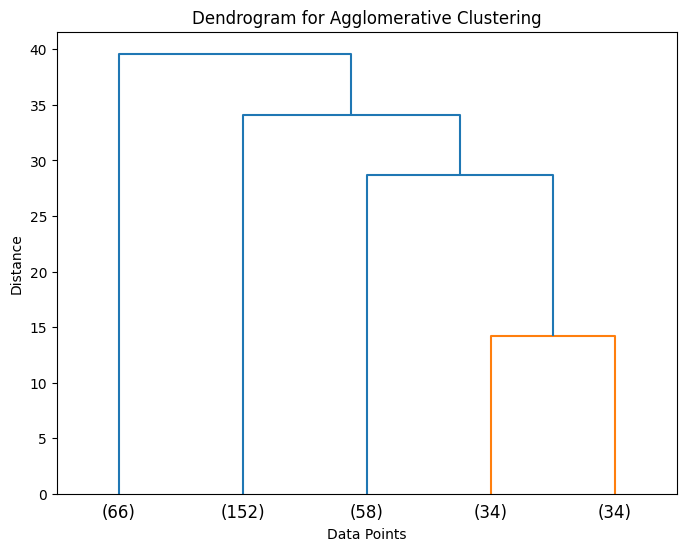

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix using hierarchical clustering with 'average' linkage
linkage_matrix = linkage(df, method='average')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, truncate_mode="lastp", p=5)  # Plot only the last p merged clusters
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()


3) DBSCAN

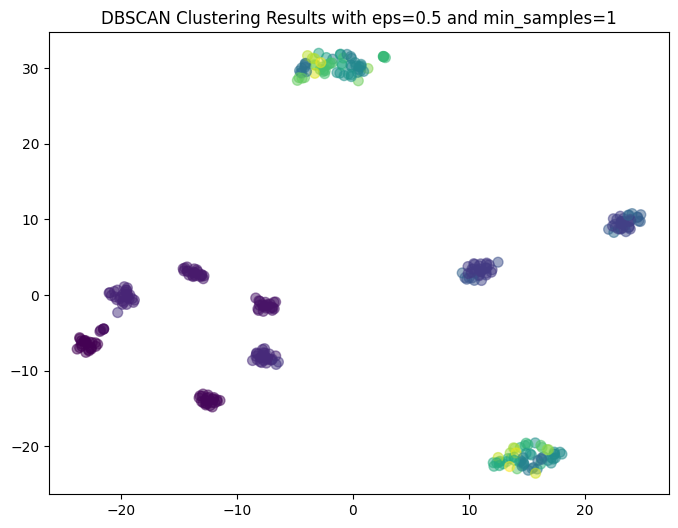

Silhouette Score: 0.39
Davies-Bouldin Index: 0.48


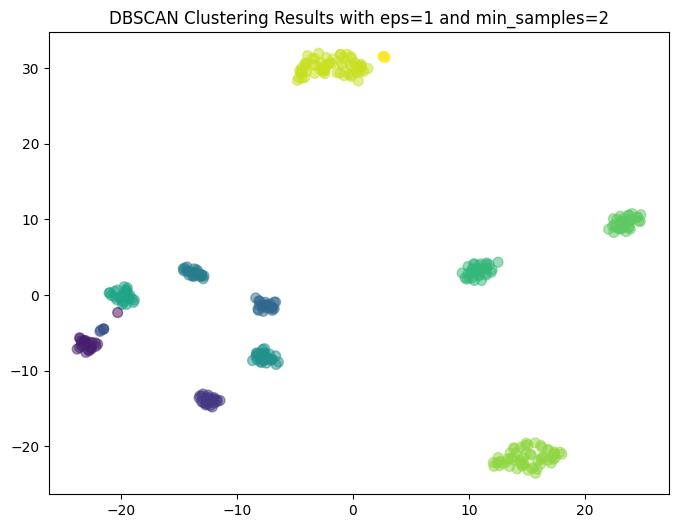

Silhouette Score: 0.75
Davies-Bouldin Index: 0.26


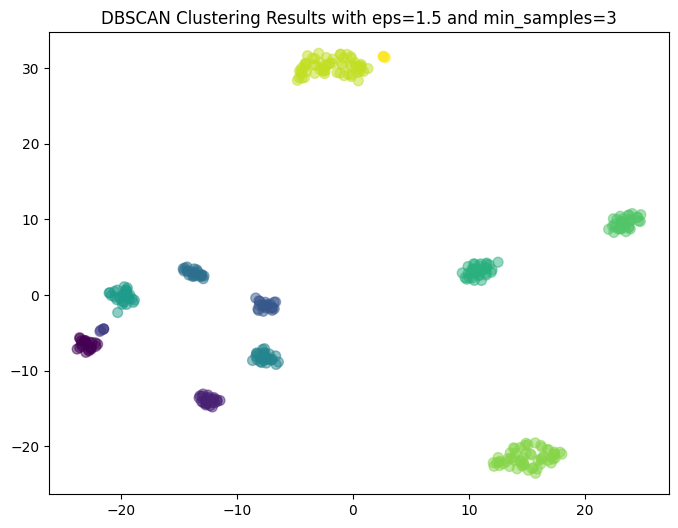

Silhouette Score: 0.77
Davies-Bouldin Index: 0.24


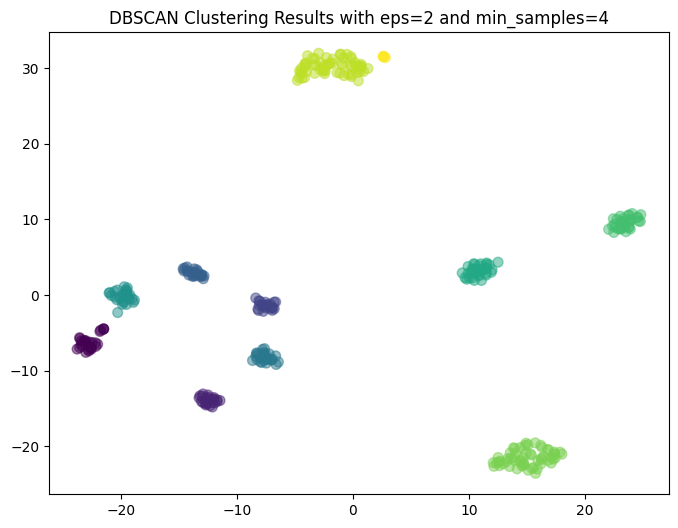

Silhouette Score: 0.79
Davies-Bouldin Index: 0.23


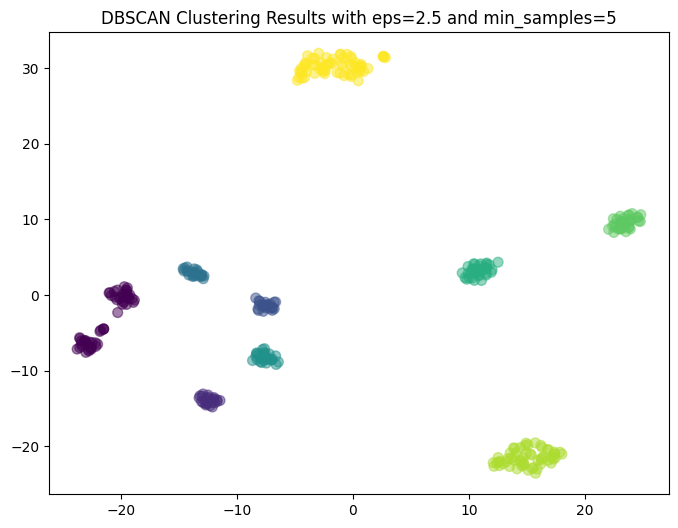

Silhouette Score: 0.84
Davies-Bouldin Index: 0.25


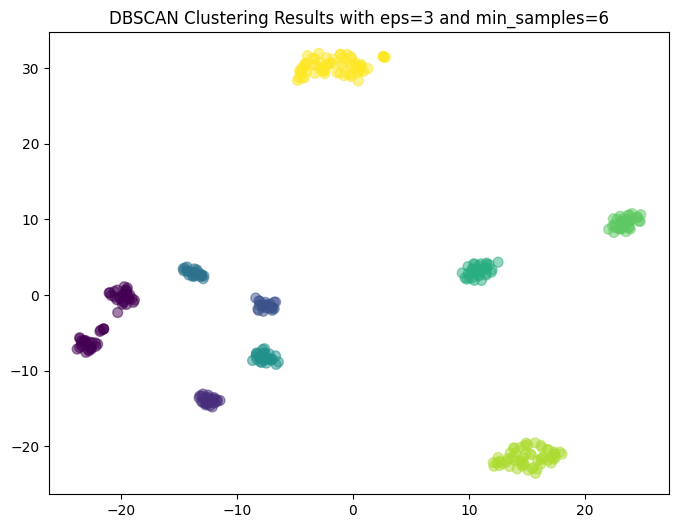

Silhouette Score: 0.84
Davies-Bouldin Index: 0.25


In [25]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Initialize DBSCAN with default parameters
db = DBSCAN()

# Fit DBSCAN to the data and obtain cluster labels
db.fit_predict(df)

# Define a range of epsilon and minimum number of points values to iterate over
ep = [0.5, 1, 1.5, 2, 2.5, 3, 5]
min_pts = [1, 2, 3, 4, 5, 6]

# Loop through different combinations of epsilon and minimum number of points
for idx in range(6):
    eps = ep[idx]
    min_samples = min_pts[idx]

    # Initialize DBSCAN with current epsilon and minimum number of points
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit DBSCAN to the data and obtain cluster labels
    dbscan_labels = dbscan.fit_predict(df)

    # Visualize clusters in a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[:, 0], df[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.5)
    plt.title('DBSCAN Clustering Results with eps=' + str(eps) + " and min_samples=" + str(min_samples))
    plt.show()

    # Calculate evaluation metrics
    silhouette = silhouette_score(df, dbscan_labels)
    davies_bouldin = davies_bouldin_score(df, dbscan_labels)

    # Print evaluation metrics
    print("Silhouette Score:", round(silhouette, 2))
    print("Davies-Bouldin Index:", round(davies_bouldin, 2))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

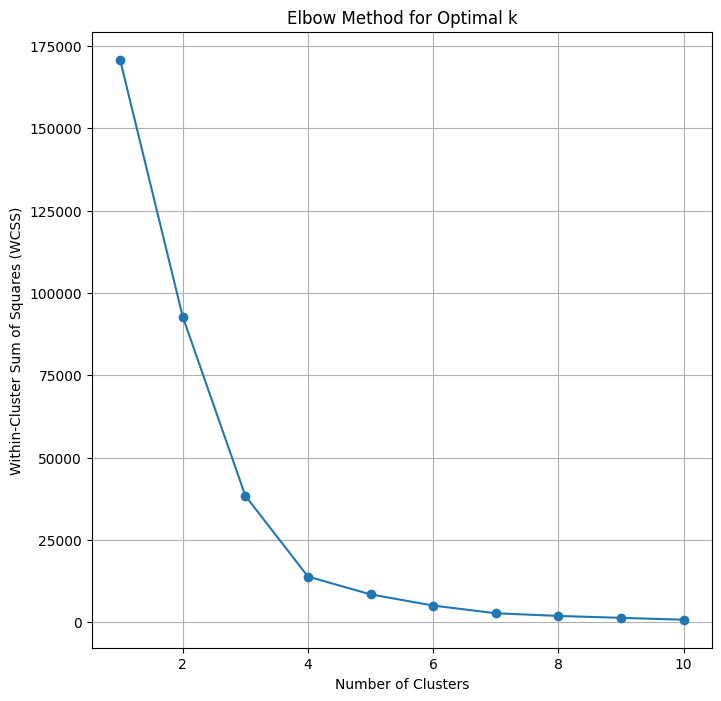

In [26]:
# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS) for each value of k
wcssK = []

# Iterate over different values of k
for k in range(1, 11):
    # Initialize KMeans with current value of k
    kmeans = KMeans(n_clusters=k)

    # Fit KMeans to the data
    kmeans.fit(df)

    # Append the WCSS to the list
    wcssK.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 8))
plt.plot(range(1, 11), wcssK, marker='o', linestyle='-')  # Plotting WCSS against number of clusters
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
